<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/stock_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Extract Tesla (TSLA) stock data
TSLA = yf.download('TSLA', start, end)

# Add a company name column
TSLA['company_name'] = 'TESLA'

# Display the last 10 rows of Tesla stock data
TSLA.tail(10)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-18,271.160004,271.440002,263.760010,265.279999,265.279999,101543300,TESLA
2023-09-19,264.350006,267.850006,261.200012,266.500000,266.500000,103704000,TESLA
2023-09-20,267.040009,273.929993,262.459991,262.589996,262.589996,122514600,TESLA
2023-09-21,257.850006,260.859985,254.210007,255.699997,255.699997,119531000,TESLA
2023-09-22,257.399994,257.790009,244.479996,244.880005,244.880005,127024300,TESLA
2023-09-25,243.380005,247.100006,238.309998,246.990005,246.990005,104636600,TESLA
2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600,TESLA
2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200,TESLA
2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,117058900,TESLA


In [ ]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,205.608526,210.110399,200.802191,205.538884,205.538884,1.331737e+08
std,44.061398,44.396057,43.622092,43.949551,43.949551,4.236029e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,5.067270e+07
25%,176.635002,182.419998,172.504997,178.474998,178.474998,1.016746e+08
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.270152e+08
75%,245.004997,250.945000,240.930000,244.639999,244.639999,1.605998e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


In [ ]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-30 to 2023-09-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


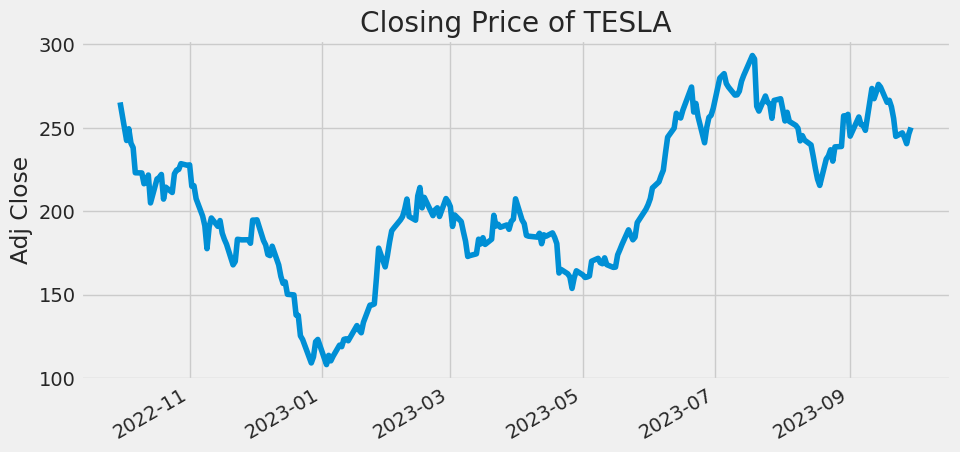

In [ ]:
plt.figure(figsize=(10, 5))
TSLA['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of TESLA")
plt.show()

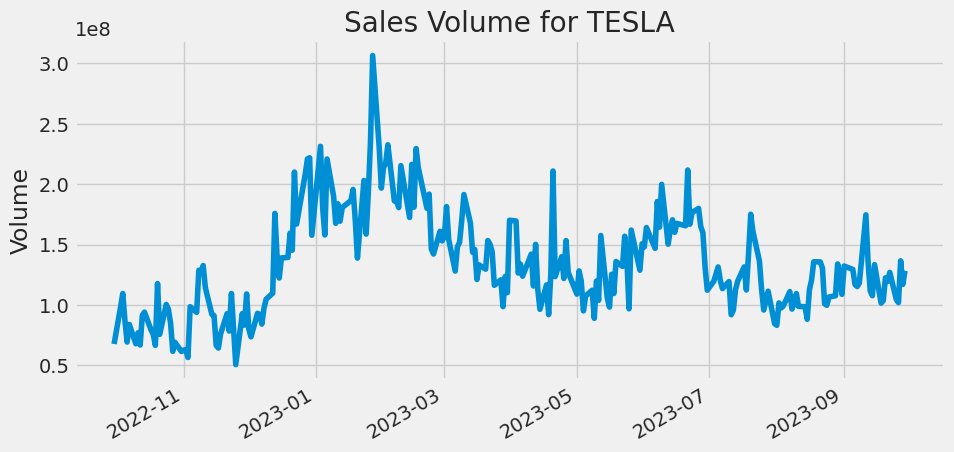

In [ ]:
# Plotting total volume of stock traded each day for Tesla (TSLA)
plt.figure(figsize=(10, 5))
TSLA['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for TESLA")
plt.show()


#MOVING AVERAGE

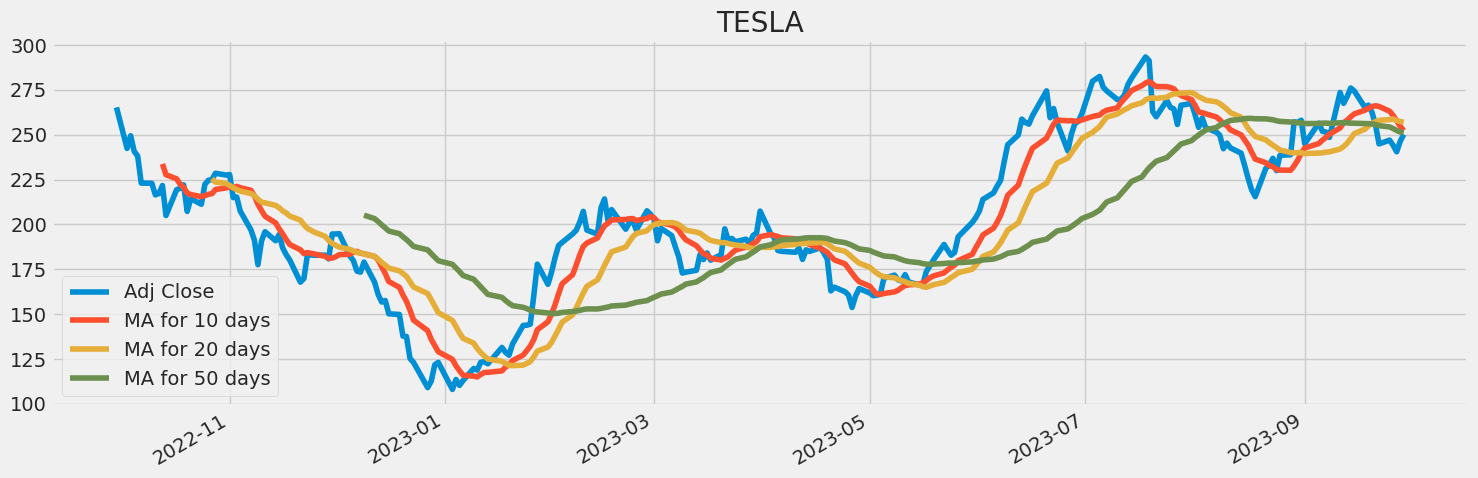

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    TSLA[f"MA for {ma} days"] = TSLA['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('TESLA')
axes.set_xlabel(None)

plt.tight_layout()
plt.show()


# plot the daily return percentage for Tesla (TSLA)

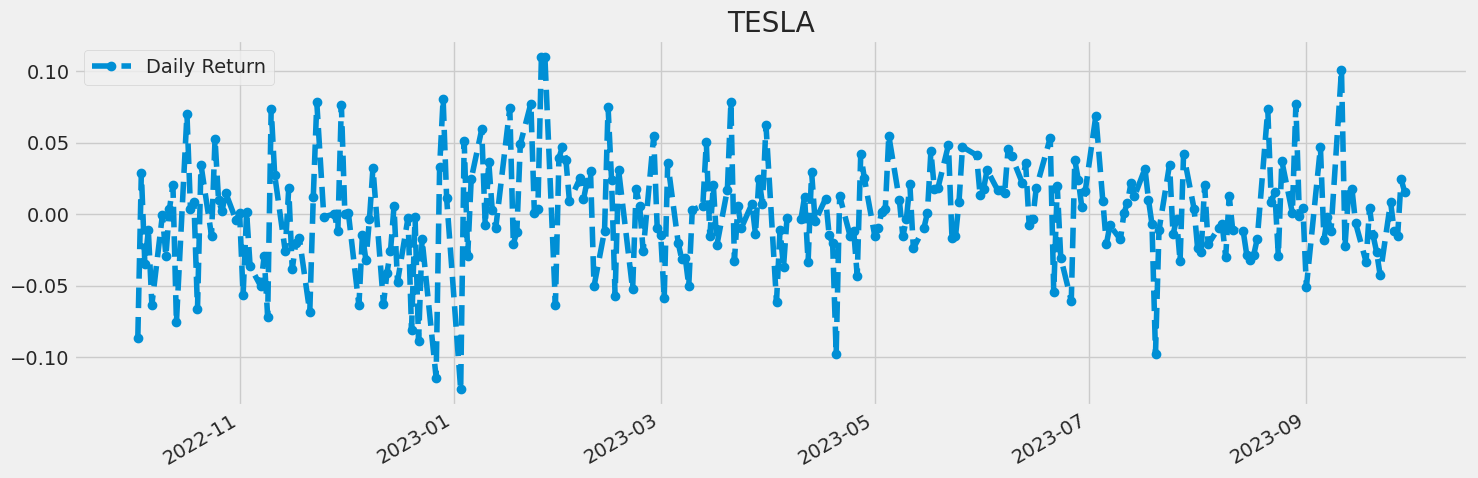

In [ ]:
# Calculate the daily return percentage for Tesla (TSLA)
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

# Plot the daily return percentage for Tesla
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

TSLA['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('TESLA')
axes.set_xlabel(None)

plt.tight_layout()
plt.show()


#the histogram of daily return percentages for Tesla (TSLA) as follows:

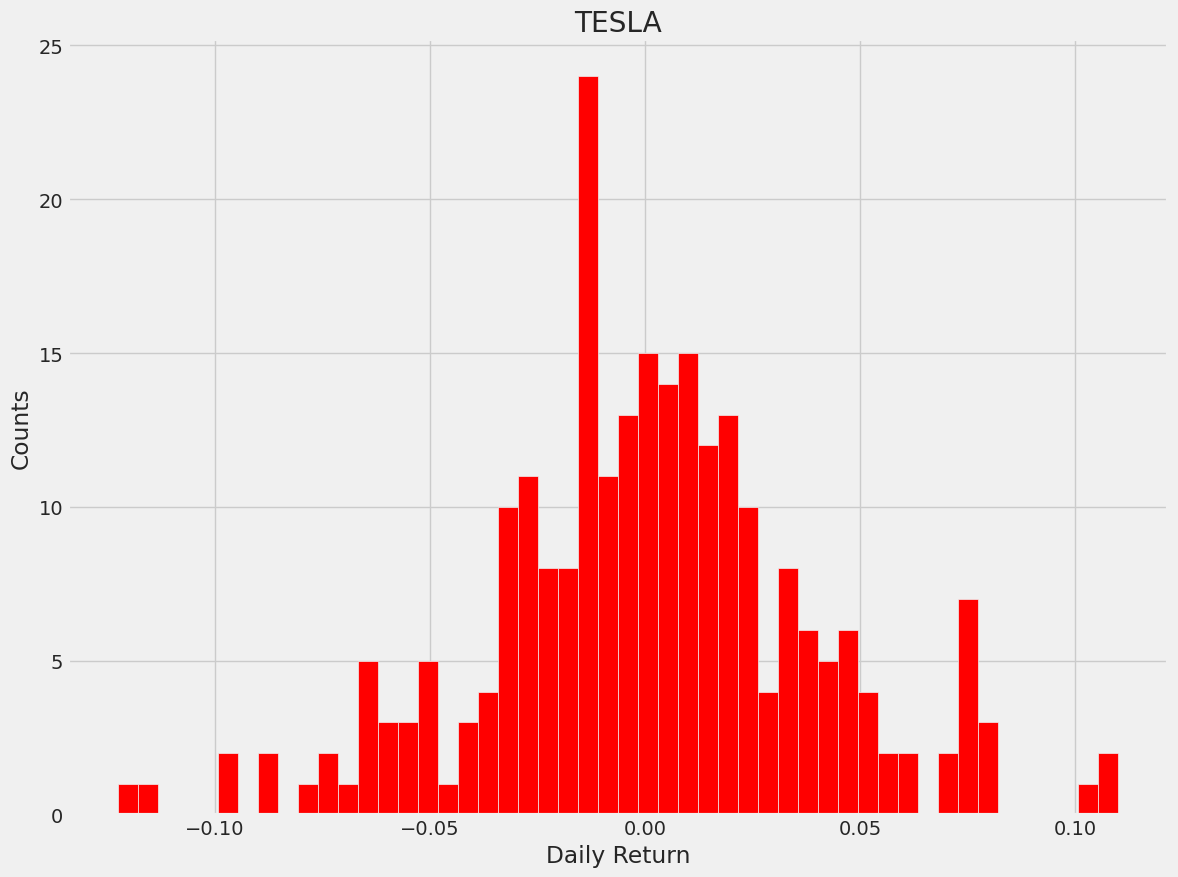

In [ ]:
plt.figure(figsize=(12, 9))

TSLA['Daily Return'].hist(bins=50,color='red')
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('TESLA')

plt.tight_layout()
plt.show()


In [ ]:
# Extract the 'Close' columns from each stock DataFrame
close_df = pd.concat([TSLA['Close']], axis=1)

# Rename the columns with the respective company names
close_df.columns = ['TESLA']

# Display the DataFrame containing the 'Close' prices for Tesla
print(close_df.tail(10))


                 TESLA
Date                  
2023-09-18  265.279999
2023-09-19  266.500000
2023-09-20  262.589996
2023-09-21  255.699997
2023-09-22  244.880005
2023-09-25  246.990005
2023-09-26  244.119995
2023-09-27  240.500000
2023-09-28  246.380005
2023-09-29  250.220001


# 5. How much value do we put at risk by investing in a particular stock?

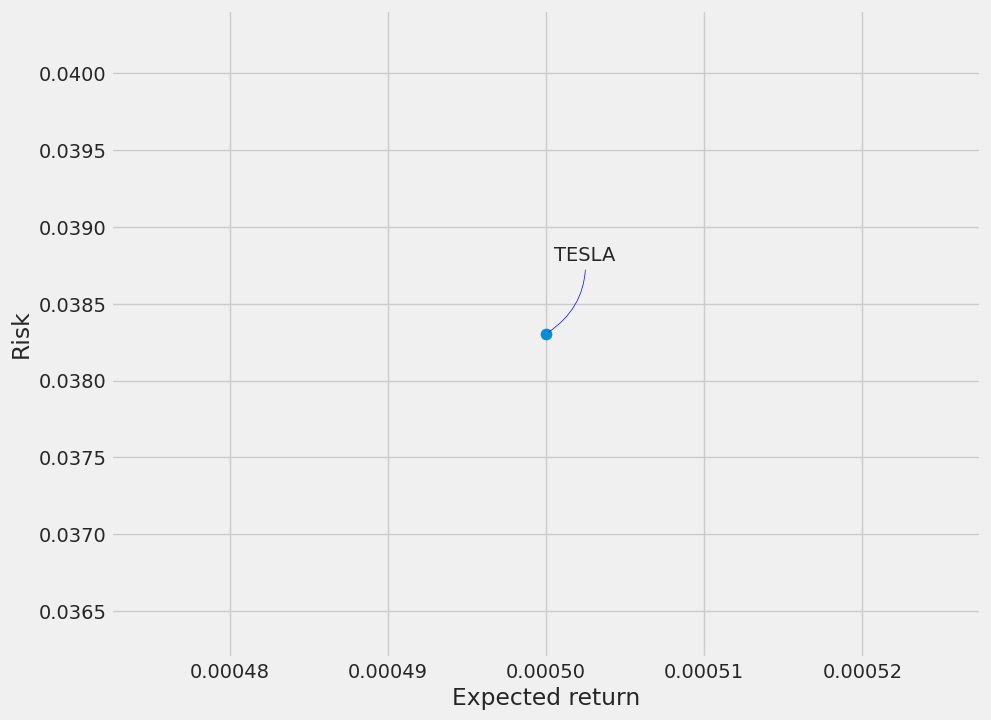

In [ ]:
# Assuming you have already loaded and calculated the daily returns for TSLA
rets = TSLA[['Adj Close']].pct_change().dropna()

# Calculate the mean and standard deviation of returns for Tesla (TSLA)
mean_return_tsla = rets['Adj Close'].mean()
std_deviation_tsla = rets['Adj Close'].std()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(mean_return_tsla, std_deviation_tsla, s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate the point for Tesla (TSLA)
plt.annotate('TESLA', xy=(mean_return_tsla, std_deviation_tsla), xytext=(50, 50),
             textcoords='offset points', ha='right', va='bottom',
             arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


# Lets predict the closing price of stock.

In [ ]:
# Define the stock symbol and start date
stock_symbol = 'TSLA'
start_date = '2020-01-01'

# Get the stock quote for Tesla
df = pdr.get_data_yahoo(stock_symbol, start=start_date, end=datetime.now())

# Show the data
print(df)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   28.299999   28.713333   28.114000   28.684000   28.684000   
2020-01-03   29.366667   30.266666   29.128000   29.534000   29.534000   
2020-01-06   29.364668   30.104000   29.333332   30.102667   30.102667   
2020-01-07   30.760000   31.441999   30.224001   31.270666   31.270666   
2020-01-08   31.580000   33.232666   31.215334   32.809334   32.809334   
...                ...         ...         ...         ...         ...   
2023-09-25  243.380005  247.100006  238.309998  246.990005  246.990005   
2023-09-26  242.979996  249.550003  241.660004  244.119995  244.119995   
2023-09-27  244.259995  245.330002  234.580002  240.500000  240.500000   
2023-09-28  240.020004  247.550003  238.649994  246.380005  246.380005   
2023-09-29  250.000000  254.770004  246.350

In [ ]:
# Define the stock symbol, start date, and end date
stock_symbol = 'TSLA'
start_date = '2020-01-01'
end_date = datetime.now()

# Get the stock quote for Tesla
df = pdr.get_data_yahoo(stock_symbol, start=start_date, end=end_date)

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.95))


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the Tesla (TSLA) data
scaled_data = scaler.fit_transform(dataset)

# The 'scaled_data' variable now contains the normalized data


# TRAINING AND TESTING THE DATA.

In [ ]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check the shape of x_train
print("Shape of x_train:", x_train.shape)


Shape of x_train: (836, 60, 1)


# Lets build  and train a Long Short-Term Memory (LSTM) neural network model using the Keras library

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


836/836 [==============================] - 36s 39ms/step - loss: 0.0039


### This code prepares the testing data for Tesla (TSLA) and uses the trained LSTM model to make predictions. It then calculates and prints the Root Mean Squared Error (RMSE) to evaluate the model's performance on the test data.

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to the end
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

print("Root Mean Squared Error (RMSE):", rmse)


2/2 [==============================] - 1s 26ms/step
Root Mean Squared Error (RMSE): 30.262318208678757


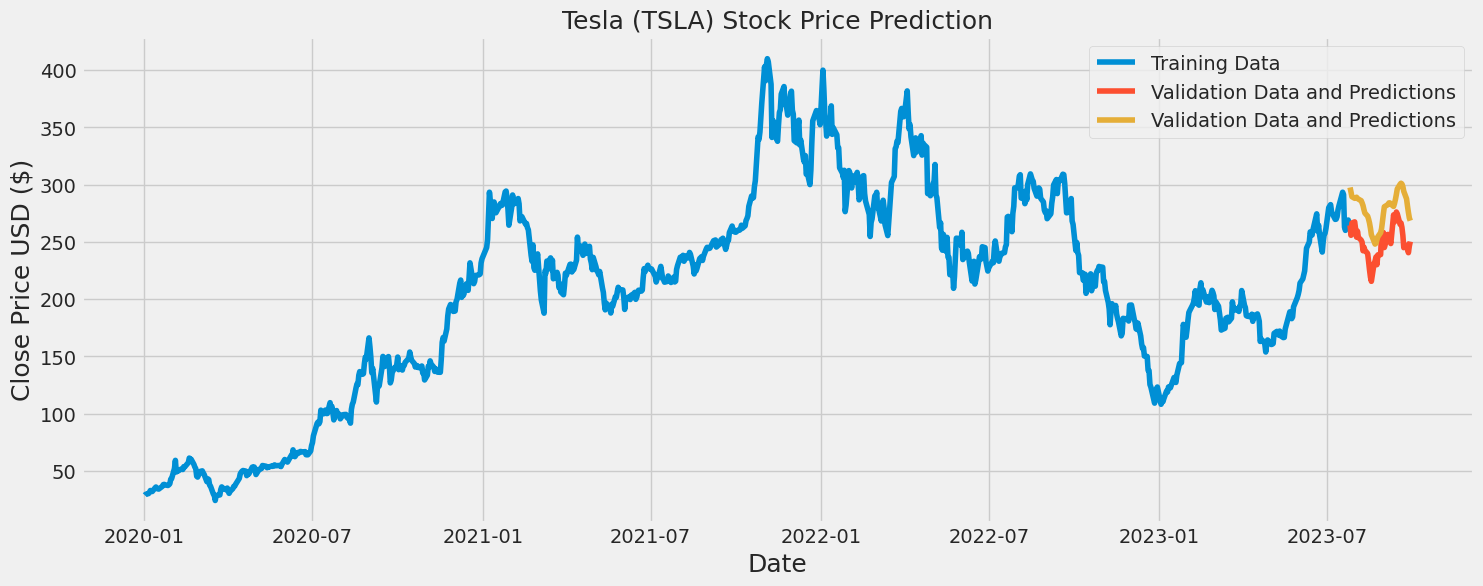

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Create a copy of the DataFrame
valid['Predictions'] = predictions  # Add the 'Predictions' column to the copy

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Tesla (TSLA) Stock Price Prediction', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close', 'Predictions']], label='Validation Data and Predictions')
plt.legend()
plt.show()




#  predicted prices

In [ ]:
valid

,Close,Predictions
Date,,
2023-07-26,264.350006,297.489990
2023-07-27,255.710007,293.637817
2023-07-28,266.440002,289.452301
2023-07-31,267.429993,287.997192
2023-08-01,261.070007,288.536682
2023-08-02,254.110001,288.940338
2023-08-03,259.320007,287.909760
2023-08-04,253.860001,287.301483
2023-08-07,251.449997,285.949158
